In [25]:
# Установка библиотеки pycaret
!pip install pycaret

In [26]:
# Загрузка датасета bank
from pycaret.datasets import get_data
data = get_data('bank')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
# Инициализация среды и подготовка данных для МО
# log_experiment = True, experiment_name = 'bank' - для логирования данных и отображения в Mlflow
from pycaret.classification import *
s = setup(data, target = 'deposit', session_id = 42, log_experiment = True, experiment_name = 'bank')

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Numeric features,7
9,Categorical features,9


In [28]:
# Preprocess == True, значит данные подготовленны верно

In [29]:
# Обучение и оценка различных моделей
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:21:36
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9096,0.0000,0.9096,0.9019,0.9044,0.5141,0.5197,0.4220
gbc,Gradient Boosting Classifier,0.9069,0.0000,0.9069,0.8955,0.8975,0.4636,0.4787,1.7040
rf,Random Forest Classifier,0.9046,0.0000,0.9046,0.8915,0.8928,0.4323,0.4531,1.1480
lr,Logistic Regression,0.9008,0.0000,0.9008,0.8857,0.8869,0.3952,0.4202,2.6790
et,Extra Trees Classifier,0.9007,0.0000,0.9007,0.8858,0.8870,0.3969,0.4214,1.5140
lda,Linear Discriminant Analysis,0.9004,0.0000,0.9004,0.8903,0.8937,0.4554,0.4622,0.3740
ada,Ada Boost Classifier,0.9002,0.0000,0.9002,0.8865,0.8893,0.4176,0.4338,0.8190
ridge,Ridge Classifier,0.8995,0.0000,0.8995,0.8830,0.8804,0.3466,0.3877,0.2330
dummy,Dummy Classifier,0.8830,0.0000,0.8830,0.7797,0.8282,0.0000,0.0000,0.2250
knn,K Neighbors Classifier,0.8826,0.0000,0.8826,0.8616,0.8678,0.2990,0.3142,0.4730


In [30]:
# модель Light Gradient Boosting Machine имеет наибольшую точность Accuracy
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [31]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

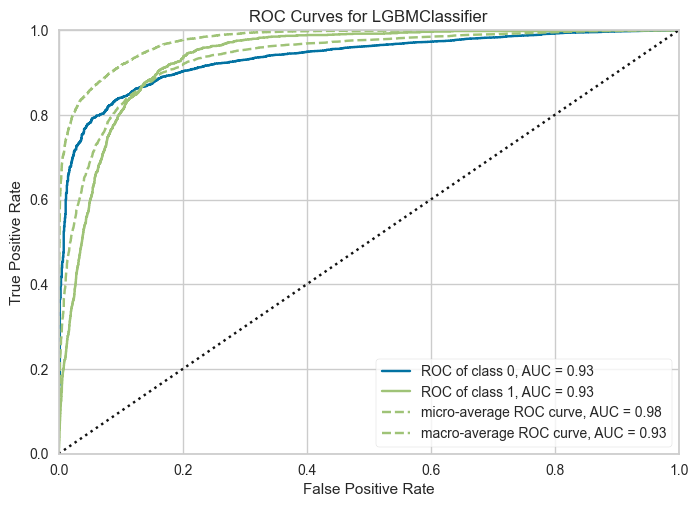

In [32]:
# functional API
plot_model(best, plot = 'auc')

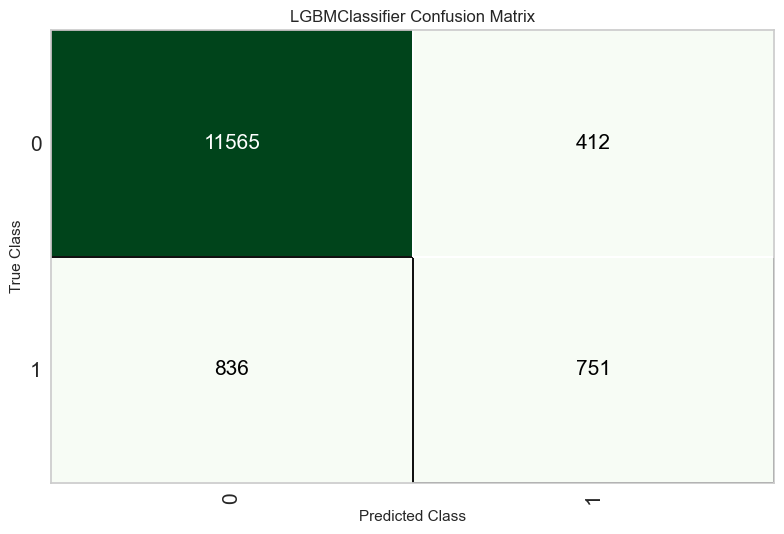

In [33]:
# functional API
plot_model(best, plot = 'confusion_matrix')

In [34]:
# functional API
predict_model(best)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,prediction_label,prediction_score
37735,40,blue-collar,divorced,secondary,no,973,no,no,cellular,14,may,449,1,-1,0,unknown,yes,no,0.7059
44332,35,unemployed,single,tertiary,no,154,no,no,cellular,29,jul,200,4,181,2,failure,yes,no,0.8544
4432,38,self-employed,married,secondary,no,736,yes,no,unknown,20,may,775,1,-1,0,unknown,no,no,0.7249
38725,35,blue-collar,married,secondary,no,205,yes,yes,cellular,15,may,1313,7,312,1,failure,yes,no,0.5431
38581,44,services,single,secondary,no,532,yes,no,cellular,15,may,550,2,340,2,failure,no,no,0.6152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15913,40,services,married,secondary,no,939,yes,no,cellular,22,jul,87,3,-1,0,unknown,no,no,0.9949
20622,38,management,married,tertiary,no,1223,no,no,cellular,12,aug,1092,5,-1,0,unknown,yes,yes,0.6467
41684,50,blue-collar,married,primary,no,383,no,no,telephone,2,oct,382,2,-1,0,unknown,no,no,0.7532
32749,38,technician,single,tertiary,no,2273,yes,no,cellular,17,apr,222,1,-1,0,unknown,no,no,0.9379


In [35]:
# functional API
predictions = predict_model(best, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9274,0.9567,0.9274,0.9221,0.9234,0.6111,0.6171


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,prediction_label,prediction_score
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,no,0.9968
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,no,0.9979
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no,0.9989
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,no,0.9984
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no,0.9967


In [36]:
# вероятность обоих классов задается через raw_score
# functional API
predictions = predict_model(best, data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9274,0.9567,0.9274,0.9221,0.9234,0.6111,0.6171


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,prediction_label,prediction_score_no,prediction_score_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,no,0.9968,0.0032
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,no,0.9979,0.0021
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no,0.9989,0.0011
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,no,0.9984,0.0016
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no,0.9967,0.0033


Ml Flow Screenshot:

![alt text](image.png)